# Incidents dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import folium
from folium.plugins import HeatMap
import matplotlib.colors as mcolors

In [11]:
filepath = r"C:/Users/clara/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DTU/Human Centeret Artificial Intelligence/2. semester/02806_Social_Data_Analysis_and_Visualization/MTA_Subway_Major_Incidents__Beginning_2020_20250429.csv"
df = pd.read_csv(filepath)

In [12]:
print(df.columns)
print(df.head())

Index(['month', 'division', 'line', 'day_type', 'category', 'count'], dtype='object')
        month    division line  day_type                            category  \
0  2024-12-01  A DIVISION    1         1                               Other   
1  2024-12-01  A DIVISION    1         1  Persons on Trackbed/Police/Medical   
2  2024-12-01  A DIVISION    1         1                             Signals   
3  2024-12-01  A DIVISION    2         1                          Subway Car   
4  2024-12-01  A DIVISION    2         1                             Signals   

   count  
0      1  
1      1  
2      2  
3      1  
4      3  


In [13]:
# Parse 'month' as datetime
df['month'] = pd.to_datetime(df['month'])

# Group by 'month' and sum the 'count'
monthly_incidents = df.groupby('month')['count'].sum().reset_index()

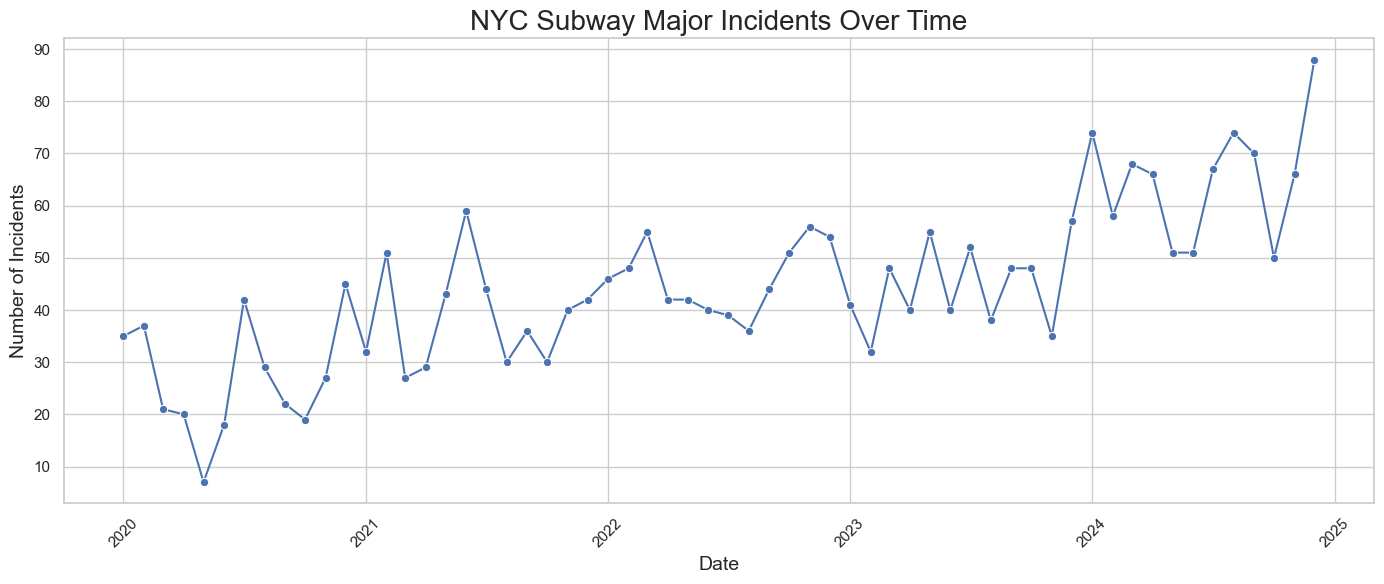

In [14]:
# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_incidents, x='month', y='count', marker="o")
plt.title('NYC Subway Major Incidents Over Time', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

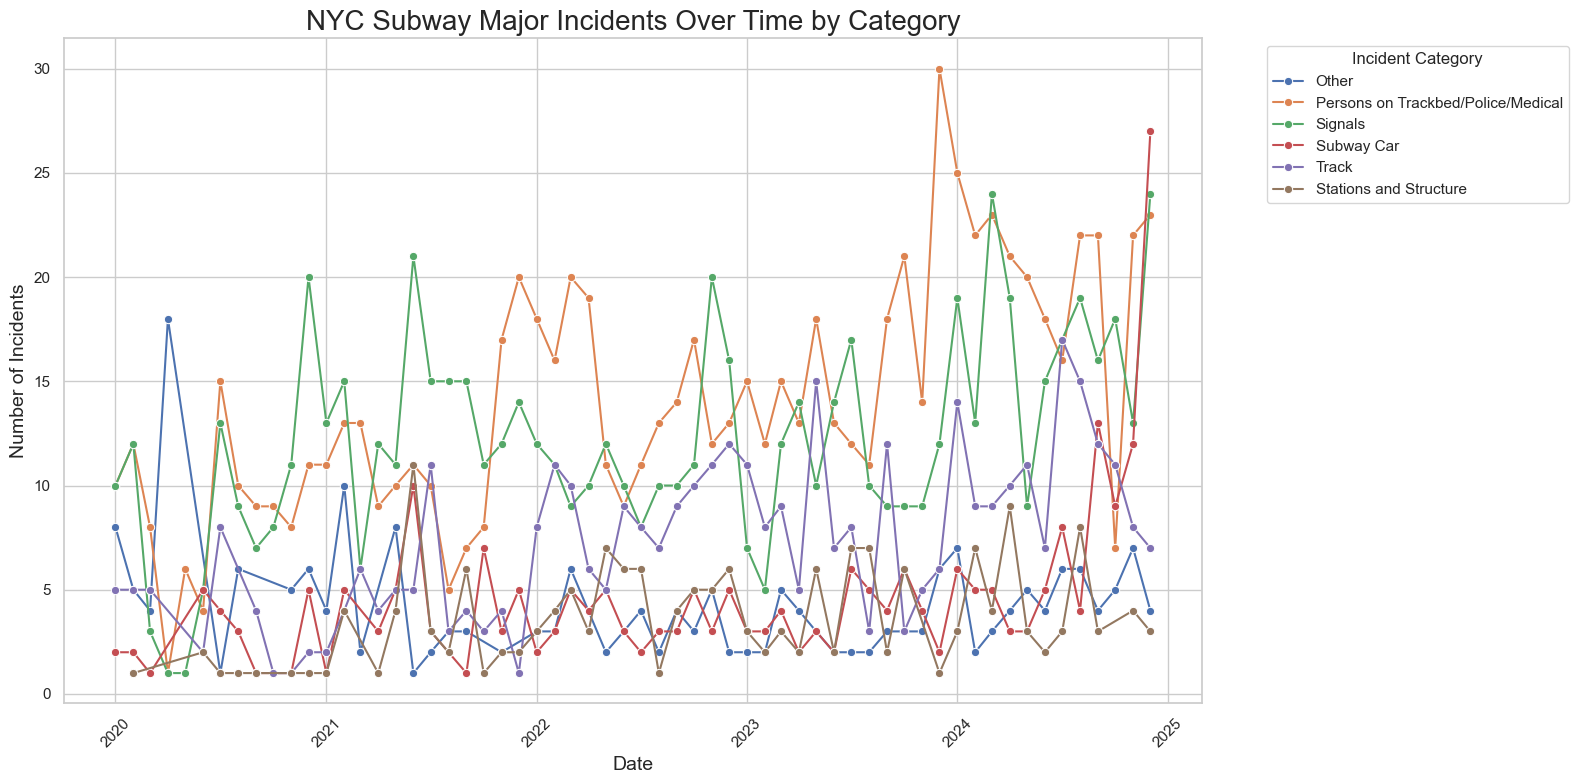

In [15]:
# Group by both 'month' and 'category', then sum counts
monthly_category = df.groupby(['month', 'category'])['count'].sum().reset_index()

# Plot
plt.figure(figsize=(16,8))
sns.lineplot(data=monthly_category, x='month', y='count', hue='category', marker="o")

plt.title('NYC Subway Major Incidents Over Time by Category', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


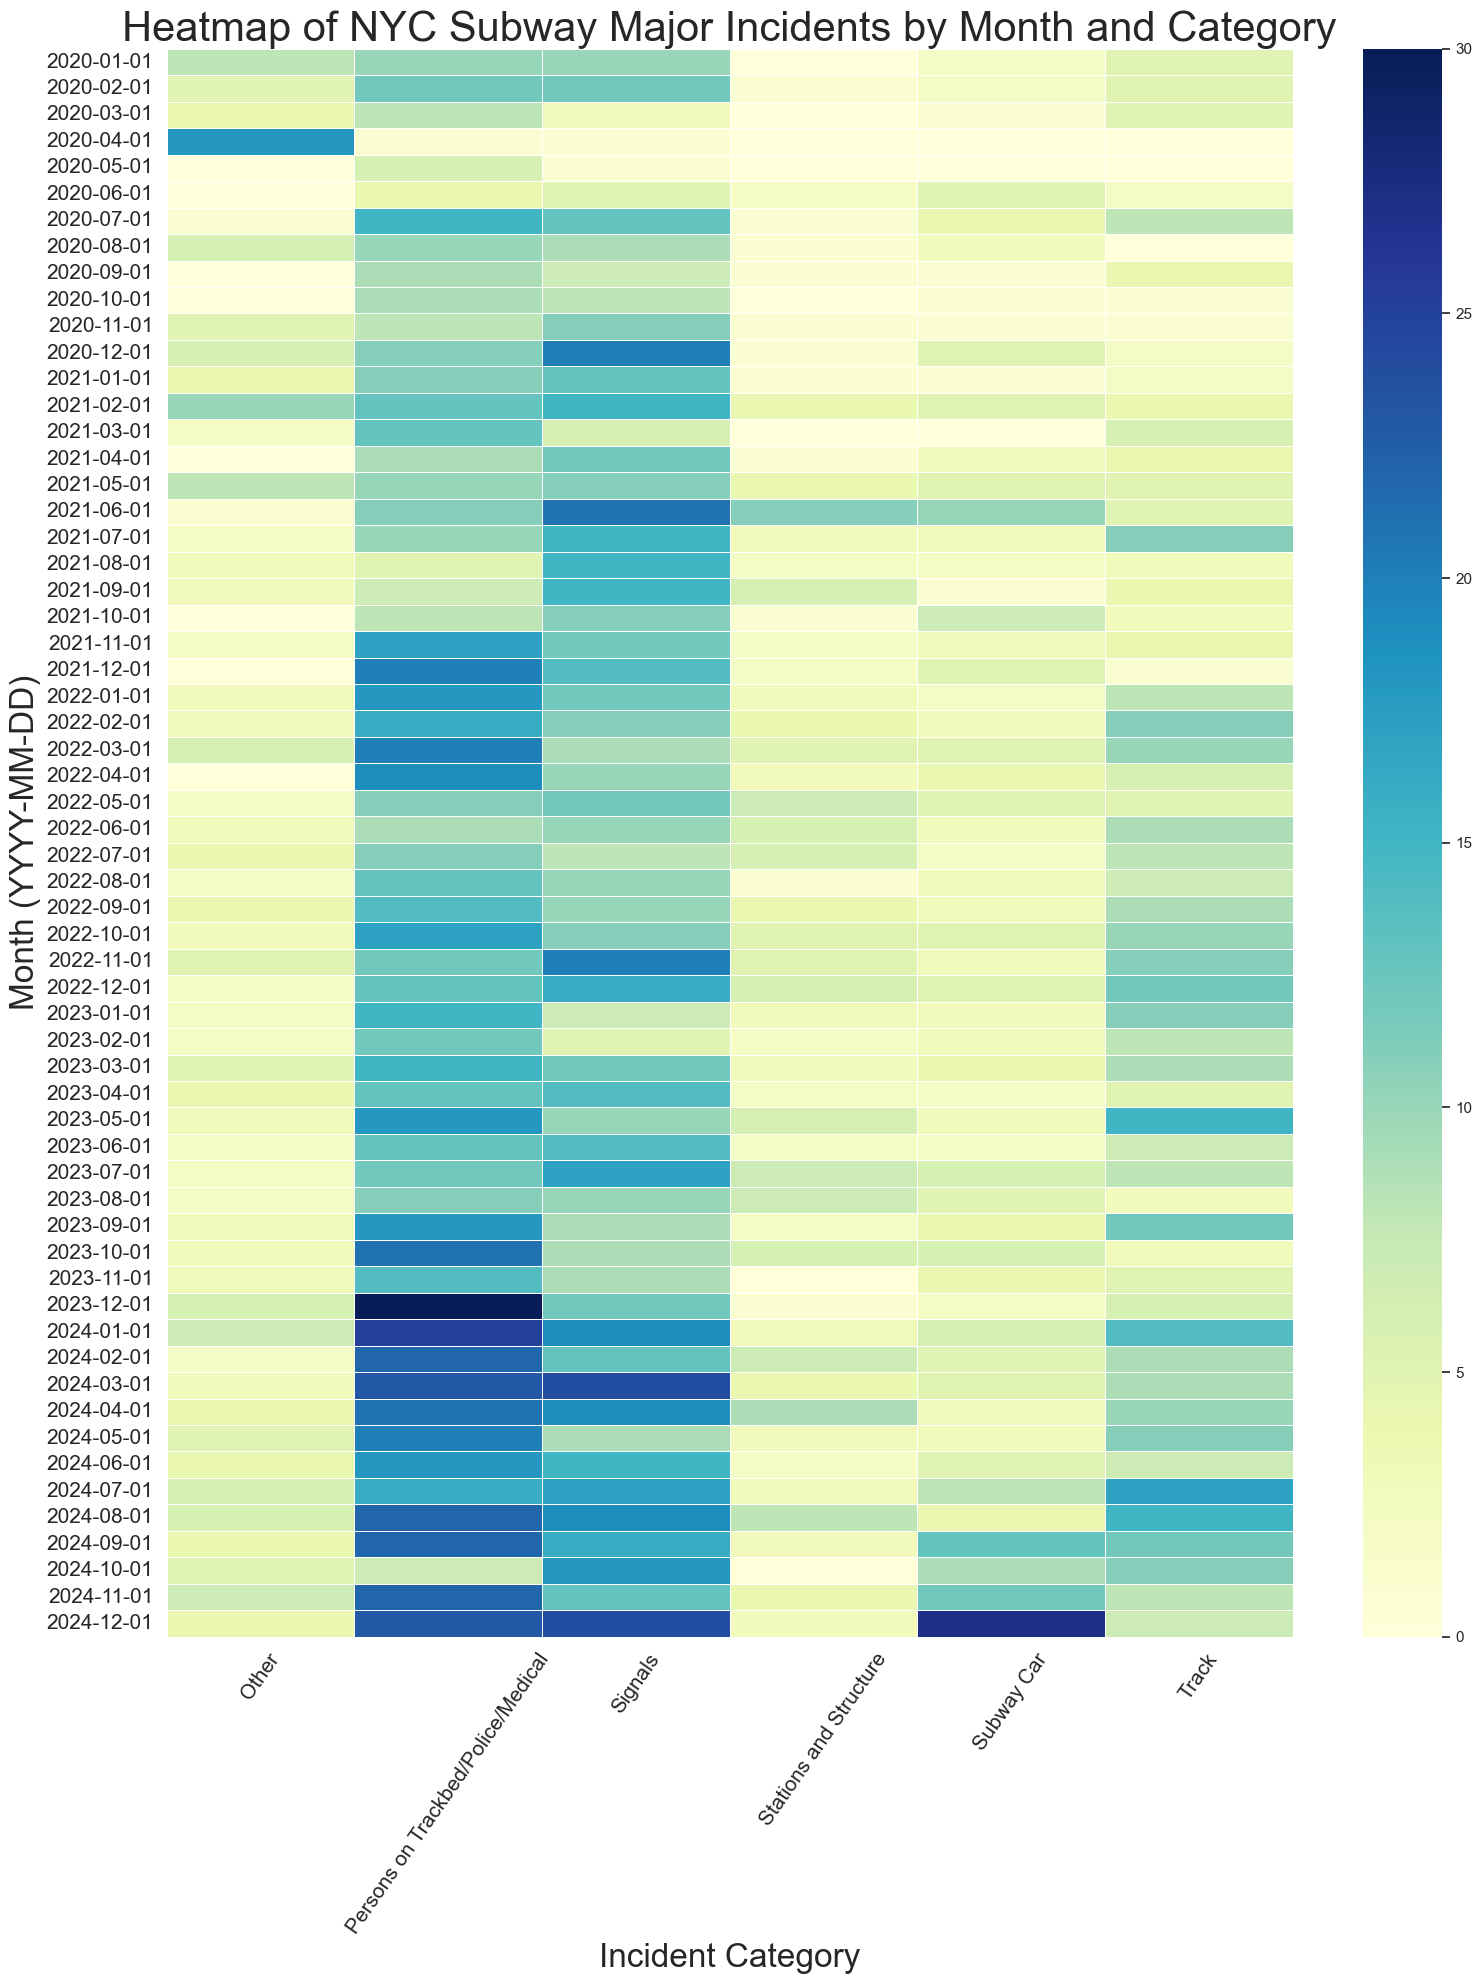

In [48]:
# Ensure 'month' column is in datetime format
df['month'] = pd.to_datetime(df['month'])

# Create pivot table for the heatmap
heatmap_data = df.pivot_table(index='month', columns='category', values='count', aggfunc='sum', fill_value=0)
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)  # Sort categories alphabetically

# Convert index to string with format YYYY-MM-DD for better y-axis labels
heatmap_data.index = heatmap_data.index.strftime('%Y-%m-%d')

# --- HEATMAP 1: YlGnBu palette, NO annotations ---
plt.figure(figsize=(16, 20))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Heatmap of NYC Subway Major Incidents by Month and Category', fontsize=30)
plt.xlabel('Incident Category', fontsize=24)
plt.ylabel('Month (YYYY-MM-DD)', fontsize=24)
plt.xticks(rotation=55, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


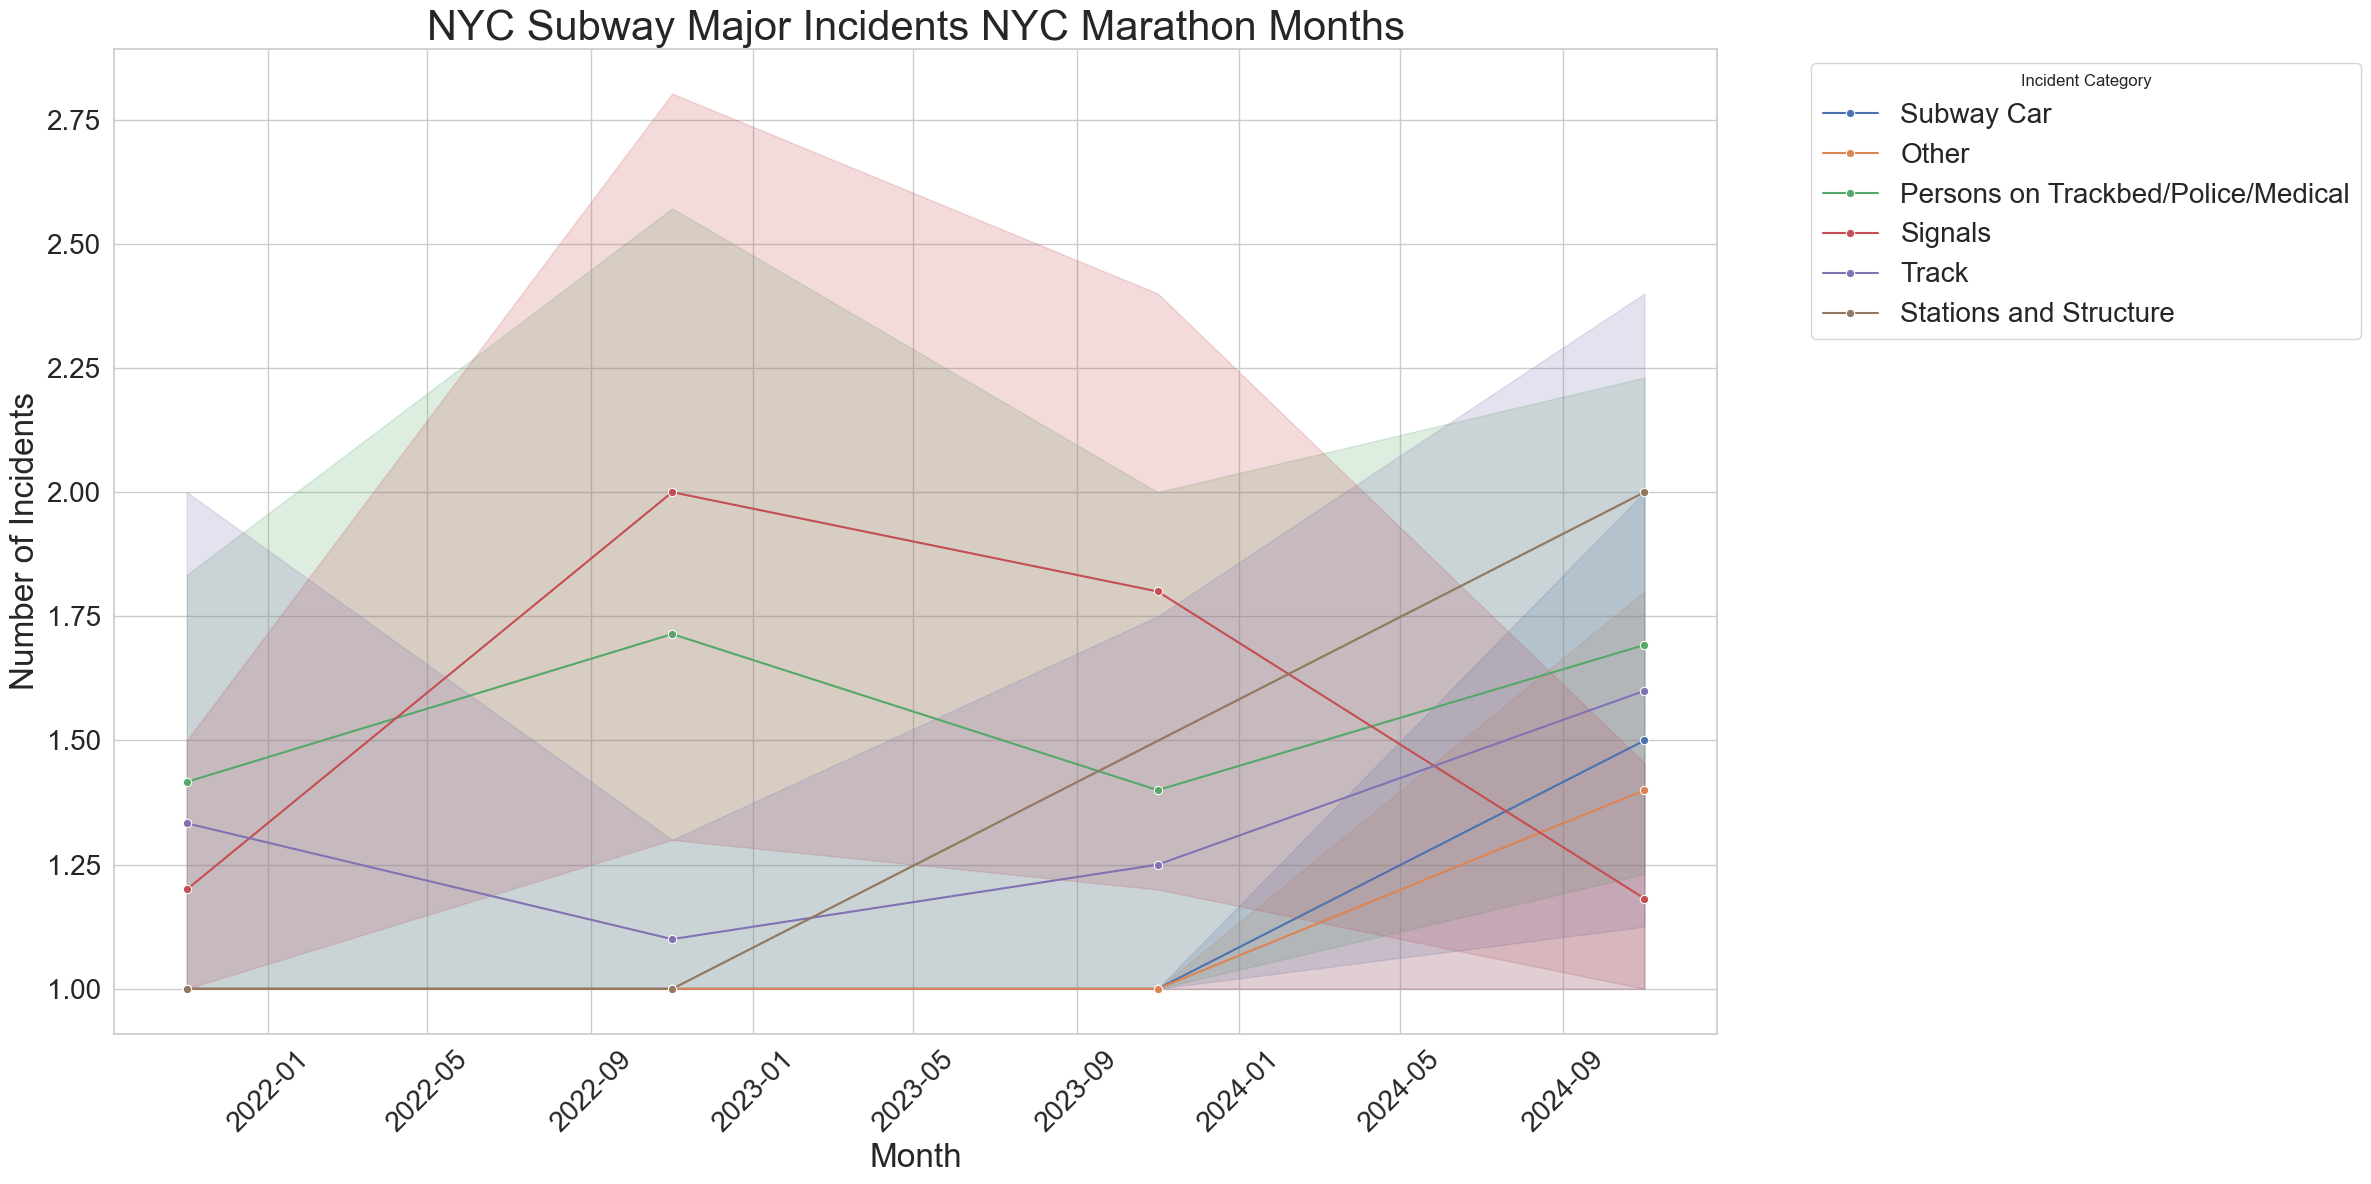

In [57]:
# --- Marathon Incident Timeline ---

# Ensure 'month' is datetime and rounded to start of month
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.to_period('M').dt.to_timestamp()

# Filter for Marathon months
marathon_months = pd.to_datetime(['2021-11', '2022-11', '2023-11', '2024-11'])
marathon_df = df[df['month'].isin(marathon_months)].copy()

# Plot
plt.figure(figsize=(24, 12))
sns.lineplot(data=marathon_df, x='month', y='count', hue='category', marker='o')
plt.title('NYC Subway Major Incidents NYC Marathon Months', fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


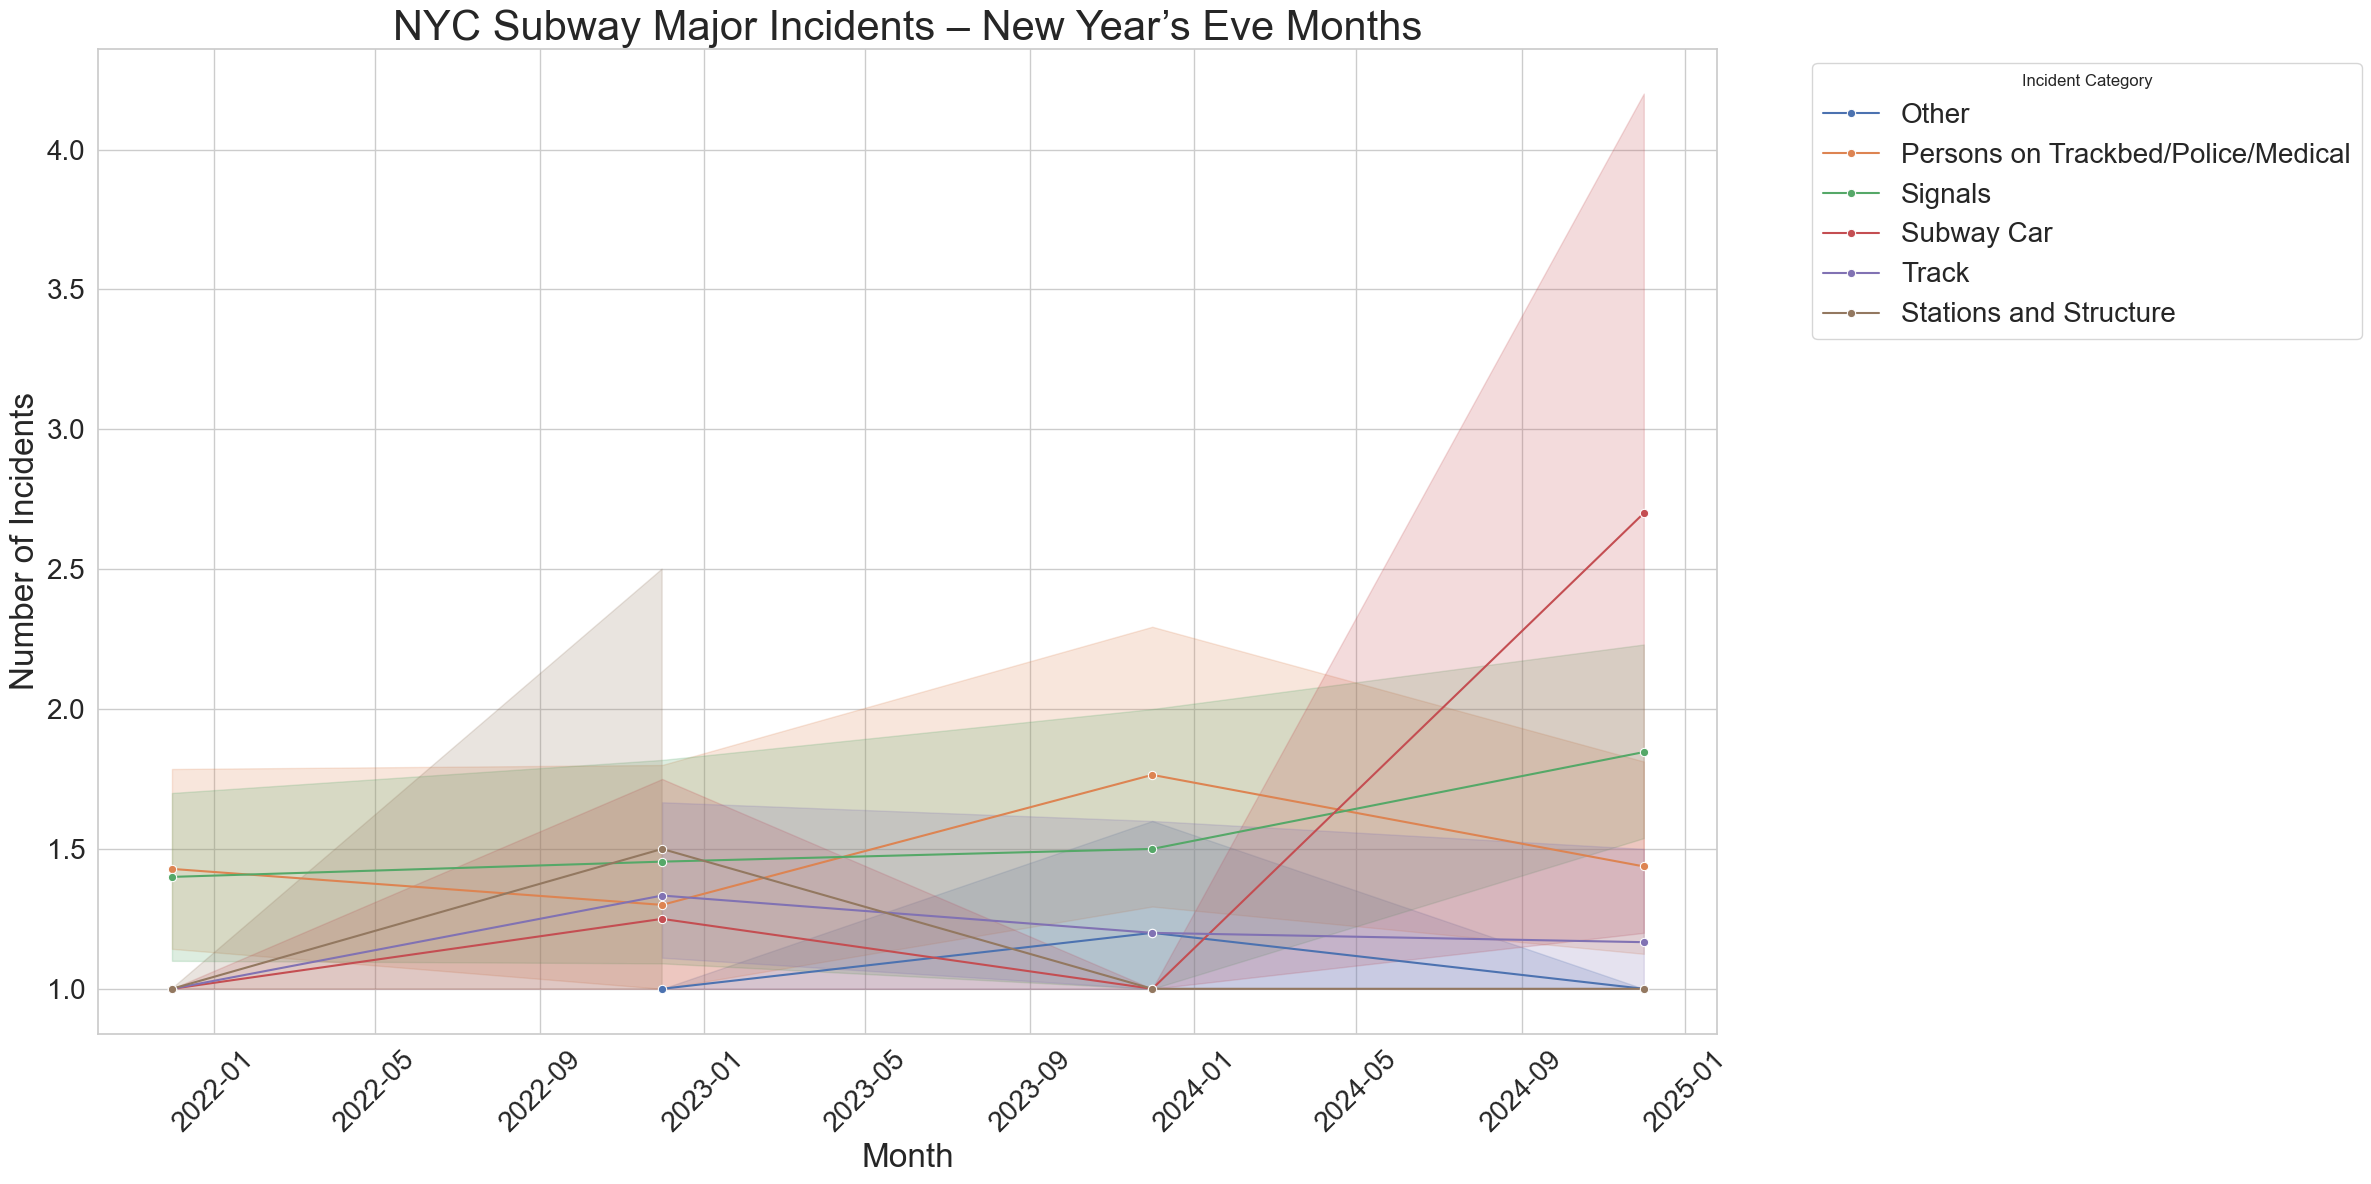

In [59]:
# --- New Year's Eve Incident Timeline ---

# Filter for December months (when NYE happens)
nye_months = pd.to_datetime(['2021-12', '2022-12', '2023-12', '2024-12'])
nye_df = df[df['month'].isin(nye_months)].copy()

# Plot
plt.figure(figsize=(24, 12))
sns.lineplot(data=nye_df, x='month', y='count', hue='category', marker='o')
plt.title('NYC Subway Major Incidents – New Year’s Eve Months', fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()
